In [1]:
import networkx as nx
import pandas as pd

# Load data from GitHub
SeattleData = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/SeattleTopData.xlsx"

# Load edges and node attributes
edges_df = pd.read_excel(SeattleData, sheet_name='edges')
nodes_df = pd.read_excel(SeattleData, sheet_name='attributes')

# Create a directed graph
G_seattle = nx.from_pandas_edgelist(edges_df, source="source", target="target", edge_attr="weight", create_using=nx.DiGraph())

# Assign node attributes
nx.set_node_attributes(G_seattle, nodes_df.set_index("name").to_dict(orient="index"))

# Save as GraphML
nx.write_graphml(G_seattle, "seattle_top_people.graphml")

print("GraphML file saved as seattle_top_people.graphml")


GraphML file saved as seattle_top_people.graphml


In [5]:
edges_df

,source,target,weight
0,rachelerman,mattmcilwain,1
1,rachelerman,DaveParkerSEA,1
2,rachelerman,toddbishop,1
3,rachelerman,ashannstew,1
4,rachelerman,LeslieFeinzaig,1
...,...,...,...
583,marybethlambert,rachelerman,1
584,marybethlambert,toddbishop,1
585,marybethlambert,ShaunaCausey,1
586,marybethlambert,moniguzman,1


In [4]:
nodes_df

,name,male,followers
0,rachelerman,0,7139
1,mattmcilwain,1,2804
2,DaveParkerSEA,1,3328
3,toddbishop,1,24500
4,ashannstew,0,3382
5,LeslieFeinzaig,0,15900
6,akipman,1,29500
7,matt_oppy,1,4847
8,gilbert,1,25800
9,juliesandler,0,7031


In [6]:
nx.get_node_attributes(G_seattle, "followers")


{'rachelerman': 7139,
 'mattmcilwain': 2804,
 'DaveParkerSEA': 3328,
 'toddbishop': 24500,
 'ashannstew': 3382,
 'LeslieFeinzaig': 15900,
 'akipman': 29500,
 'matt_oppy': 4847,
 'gilbert': 25800,
 'juliesandler': 7031,
 'BradSmi': 96300,
 'crashdev': 8773,
 'ShaunaCausey': 47400,
 'john_gabbert': 2482,
 'moniguzman': 29000,
 'mattmday': 5750,
 'Rich_Barton': 31300,
 'daryn': 2378,
 'lovelletters': 4553,
 'etzioni': 27400,
 'MissDestructo': 41800,
 'heatherredman': 3957,
 'danshapiro': 10900,
 'medinism': 2084,
 'KieranSnyder': 15400,
 'hadip': 43300,
 'RajSinghSeattle': 4991,
 'funcOfJoe': 9510,
 'kirbywinfield': 6230,
 'stevesi': 206666,
 'Ryanintheus': 194239,
 'sonalpmane': 1215,
 'SoGulley': 965,
 '2morrowknight': 737130,
 'jinman': 4781,
 'tarah': 48992,
 'Jenerationy': 13272,
 'lanctot': 5519,
 'Kristen_Hammy': 1196,
 'nhuntwalker': 5032,
 'eugenio_pace': 4908,
 'JenMsft': 90185,
 'PeterHamilton': 7329,
 'sarahstood': 1118,
 'mcolacurcio': 2039,
 'marybethlambert': 1010}

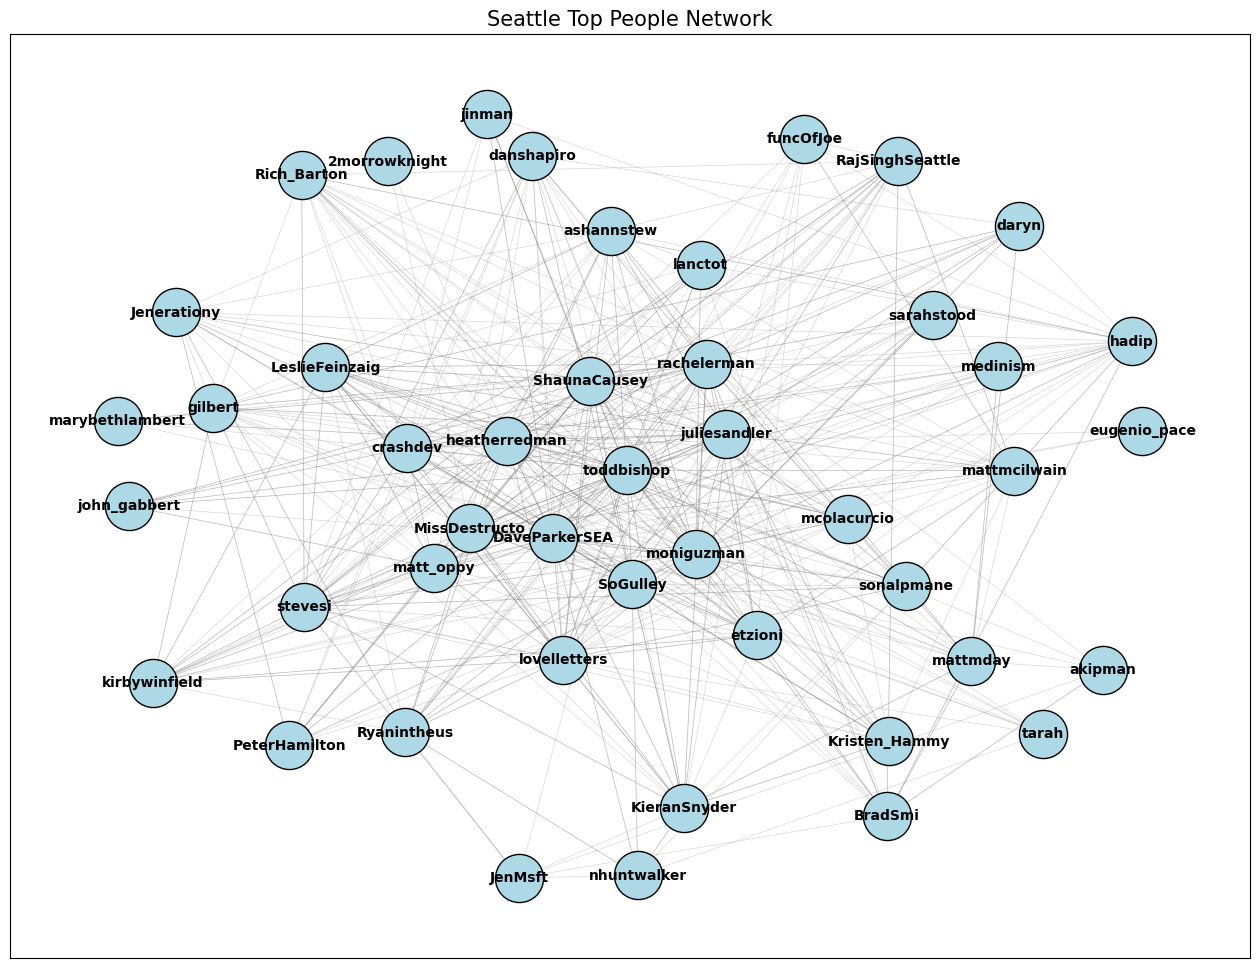

In [2]:
import matplotlib.pyplot as plt

# Load the GraphML file
G = nx.read_graphml("seattle_top_people.graphml")

# Generate node positions with more spacing
pos = nx.spring_layout(G, k=2, seed=42)  # Increased k for better spacing

# Customize edge appearance to reduce clutter
plt.figure(figsize=(16, 12))  # Bigger canvas for better visibility

# **1. Draw edges with transparency & thickness**
nx.draw_networkx_edges(
    G, pos, alpha=0.3, width=0.5, edge_color="gray", arrows=True
)

# **2. Draw nodes with size adjustments**
nx.draw_networkx_nodes(
    G, pos, node_color="lightblue", node_size=1200, edgecolors="black"
)

# **3. Draw labels with better spacing**
nx.draw_networkx_labels(
    G, pos, font_size=10, font_color="black", font_weight="bold"
)

plt.title("Seattle Top People Network", fontsize=15)
plt.show()